In [18]:
import pandas as pd
import numpy as np

# Load Rtab
rtab = pd.read_csv("gene_presence_absence.Rtab", sep="\t")

# Extract matrix
matrix = rtab.iloc[:, 1:]
matrix = (matrix > 0).astype(int)

# Set gene IDs properly as index
matrix.index = rtab.iloc[:, 0]

n_genomes = matrix.shape[1]

# Compute counts
gene_counts = matrix.sum(axis=1)
gene_freq = gene_counts / n_genomes

# Build dataframe from index (important)
structure_df = pd.DataFrame({
    "gene_id": matrix.index,
    "count": gene_counts.values,
    "frequency": gene_freq.values
})

# Sanity check
print("Total rows:", structure_df.shape[0])
print("Unique gene IDs:", structure_df["gene_id"].nunique())


Total rows: 6361
Unique gene IDs: 6361


In [19]:
def assign_compartment(freq):
    if freq >= 0.99:
        return "Core"
    elif freq >= 0.95:
        return "Soft-core"
    elif freq >= 0.15:
        return "Shell"
    else:
        return "Cloud"

structure_df["compartment"] = structure_df["frequency"].apply(assign_compartment)

counts = structure_df["compartment"].value_counts()

print(counts)
print("Sum compartments:", counts.sum())


compartment
Cloud        3086
Core         1991
Shell        1205
Soft-core      79
Name: count, dtype: int64
Sum compartments: 6361


In [20]:
import matplotlib.pyplot as plt

order = ["Core", "Soft-core", "Shell", "Cloud"]

counts = structure_df["compartment"].value_counts().reindex(order)

print(counts)


compartment
Core         1991
Soft-core      79
Shell        1205
Cloud        3086
Name: count, dtype: int64


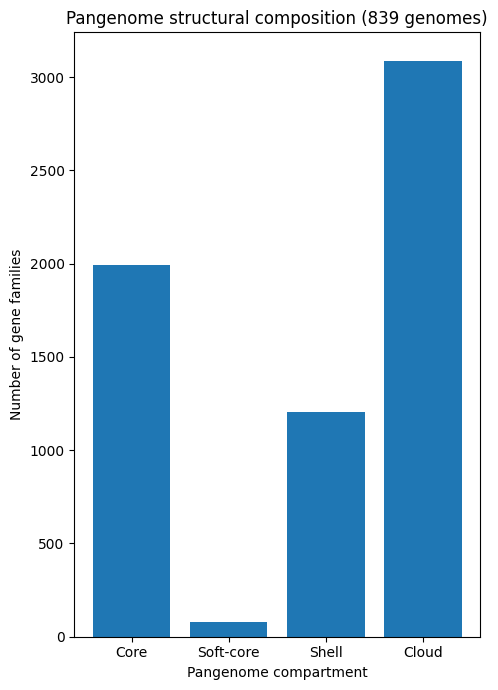

In [24]:
plt.figure(figsize=(5,7))

plt.bar(counts.index, counts.values)

plt.xlabel("Pangenome compartment")
plt.ylabel("Number of gene families")
plt.title("Pangenome structural composition (839 genomes)")

plt.tight_layout()
plt.show()


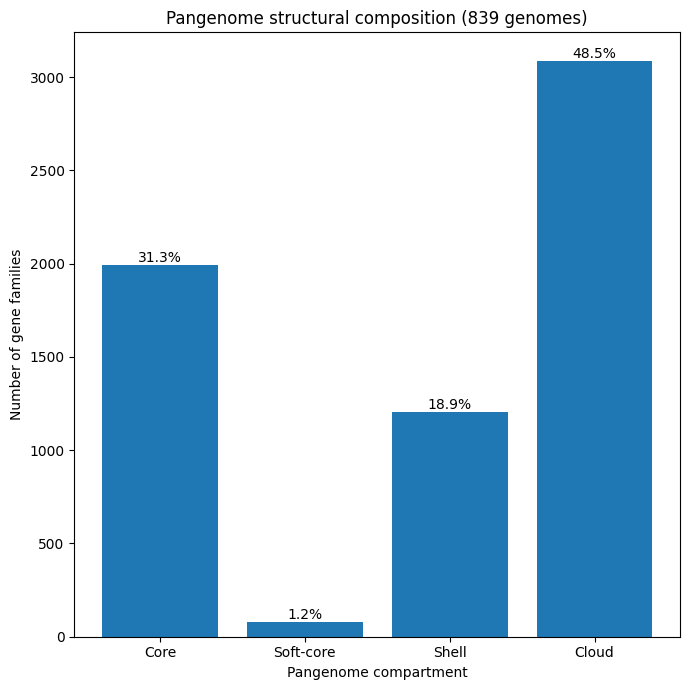

In [27]:
plt.figure(figsize=(7,7))

bars = plt.bar(counts.index, counts.values)

total = counts.sum()

for bar in bars:
    height = bar.get_height()
    percent = (height / total) * 100
    plt.text(bar.get_x() + bar.get_width()/2,
             height,
             f"{percent:.1f}%",
             ha='center',
             va='bottom')

plt.xlabel("Pangenome compartment")
plt.ylabel("Number of gene families")
plt.title("Pangenome structural composition (839 genomes)")

plt.tight_layout()
plt.show()


In [26]:
structure_df.to_csv("Pangenome_structure_gene_level_table.csv", index=False)


In [28]:
counts = structure_df["compartment"].value_counts()

summary_df = pd.DataFrame({
    "Compartment": counts.index,
    "Gene_count": counts.values,
    "Percentage": (counts.values / counts.sum()) * 100
})

summary_df.to_csv("Pangenome_structure_summary_table.csv", index=False)


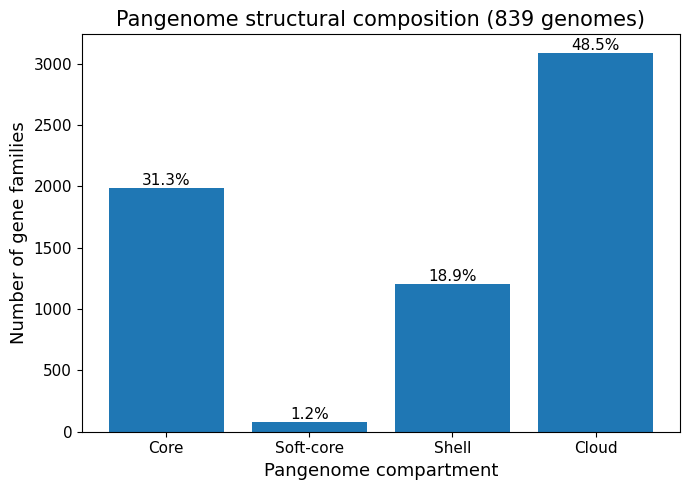

In [29]:
import matplotlib.pyplot as plt

order = ["Core", "Soft-core", "Shell", "Cloud"]
counts = structure_df["compartment"].value_counts().reindex(order)

plt.figure(figsize=(7,5))

bars = plt.bar(counts.index, counts.values)

total = counts.sum()

for bar in bars:
    height = bar.get_height()
    percent = (height / total) * 100
    plt.text(bar.get_x() + bar.get_width()/2,
             height,
             f"{percent:.1f}%",
             ha='center',
             va='bottom',
             fontsize=11)  # increased label size

plt.xlabel("Pangenome compartment", fontsize=13)
plt.ylabel("Number of gene families", fontsize=13)
plt.title("Pangenome structural composition (839 genomes)", fontsize=15)

plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.tight_layout()

plt.savefig("Figure_3_Pangenome_structure.png", dpi=300, bbox_inches="tight")
plt.savefig("Figure_3_Pangenome_structure.pdf", bbox_inches="tight")

plt.show()
